Feature names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target names: ['setosa' 'versicolor' 'virginica']
(120, 4)
(30, 4)
1.0
Predictions:  [np.str_('versicolor'), np.str_('virginica')]


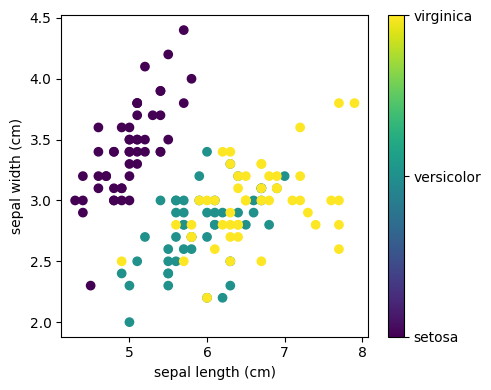

In [3]:
# Load the iris dataset from sklearn's datasets module
from sklearn.datasets import load_iris
iris = load_iris()  # The dataset contains features (X) and labels (y)

# Store the feature matrix (X) which contains the input data, and the response vector (y) which contains the output labels (species)
X = iris.data  # Feature matrix: 150 samples, 4 features
y = iris.target  # Response vector: 150 labels (species)

# Access the feature names and target names for reference
feature_names = iris.feature_names  # List of feature names (e.g., sepal length, sepal width, etc.)
target_names = iris.target_names  # List of target names (species)

# Print the feature and target names to the console for inspection
print("Feature names:", feature_names) 
print("Target names:", target_names) 

# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
# `test_size=0.2` means 20% of the data will be used for testing, 80% for training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Print the shape of the training and test datasets to confirm the split
print(X_train.shape)  # Training data shape (e.g., 120 samples, 4 features)
print(X_test.shape)   # Test data shape (e.g., 30 samples, 4 features)

# Initialize K-Nearest Neighbors (KNN) classifier with n_neighbors=3 (the number of neighbors used to classify)
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Fit the KNN model on the training data
knn.fit(X_train, y_train)  # Trains the model using X_train and y_train

# Alternative model: Decision Tree Classifier (commented out here)
# from sklearn.tree import DecisionTreeClassifier 
# knn = DecisionTreeClassifier()  # Decision tree model
# knn.fit(X_train, y_train)  # Train decision tree model (this would replace KNN if uncommented)

# Make predictions using the trained KNN model
y_pred = knn.predict(X_test)  # Predict species for test data (X_test)

# Evaluate the model's performance by calculating accuracy
from sklearn import metrics
# Accuracy score is the ratio of correct predictions to total predictions
print(metrics.accuracy_score(y_test, y_pred))  # Compare true labels (y_test) with predicted labels (y_pred)

# Model persistence: Save the trained KNN model to a file so it can be used again without retraining
import joblib  # joblib is used to serialize the model
joblib.dump(knn, 'mlbrain.joblib')  # Save the trained KNN model to a file 'mlbrain.joblib'

# Load the saved model from the file
model = joblib.load('mlbrain.joblib')  # Reload the model into memory

# Predict using the reloaded model
model.predict(X_test)

# Example of making predictions with new samples
sample = [[3, 5, 4, 2], [2, 3, 5, 4]]  # New samples with 4 features each
predictions = model.predict(sample)  # Make predictions for the new samples

# Convert predicted indices to species names using iris.target_names
pred_species = [iris.target_names[p] for p in predictions]  # Map prediction indices to species names

# Print the predicted species for the new samples
print("Predictions: ", pred_species)

# Data visualization: We will plot the iris dataset to visualize the relationship between features
import matplotlib.pyplot as plt

# Choose the indices of the features to plot (e.g., sepal length and sepal width)
x_index = 0  # Sepal length
y_index = 1  # Sepal width

# Create a color formatter that maps numerical values to species names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

# Configure the plot settings
plt.figure(figsize=(5, 4))  # Set figure size
# Scatter plot of the chosen features (x_index and y_index), colored by species (iris.target)
plt.scatter(iris.data[:, x_index], iris.data[:, y_index], c=iris.target)
# Add a colorbar with ticks corresponding to species
plt.colorbar(ticks=[0, 1, 2], format=formatter)
# Label the x and y axes with feature names
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])

# Adjust layout to avoid overlapping elements
plt.tight_layout()
plt.show()  # Display the plot



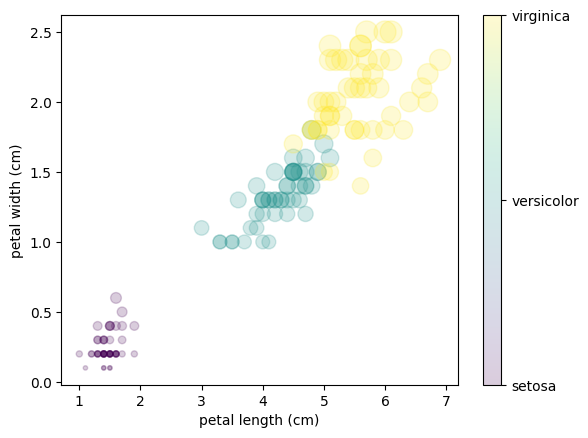

In [4]:

# Alternative plot: visualize petal length (index 2) vs petal width (index 3)
features = iris.data.T  # Transpose the features matrix for easier plotting
# Scatter plot with size and color indicating petal width and species, respectively
plt.scatter(features[2], features[3], alpha=0.2, s=100*features[3], c=iris.target, cmap='viridis')
# Label the axes with the feature names
plt.xlabel(iris.feature_names[2])  # Petal length
plt.ylabel(iris.feature_names[3])  # Petal width
# Add a colorbar with species names
plt.colorbar(ticks=[0, 1, 2], format=formatter)

# Show the second plot
plt.show()